# Импорт и преобразование данных для работы

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/Сводный отчет за декабрь.xlsx', header=1)

In [5]:
if 'Название ККТ' in data.columns:
    # выберем данные с одной точки
    data = data[data['Название ККТ'] == 'ТРЦ "Фокус"']
    # выберем только данные прихода
    data = data[data['Тип операции'] == 'Приход']
    data['t'] = data['Дата и время'].apply(lambda x: x.day)

    data.drop(columns=['Тип операции', 'Наличными', 'Безналичными', 'Название ККТ', 'Дата и время'], inplace=True)
    data.rename(columns = {
        'Сумма': 'Y(t)'
    }, inplace=True)
data_frame = data.groupby(['t']).sum()
data_frame.reset_index(inplace=True)
data_frame.head()

,t,Y(t)
0,1,590.0
1,2,19900.0
2,3,16200.0
3,4,2570.0
4,5,7330.0


# Отображение данных на графике

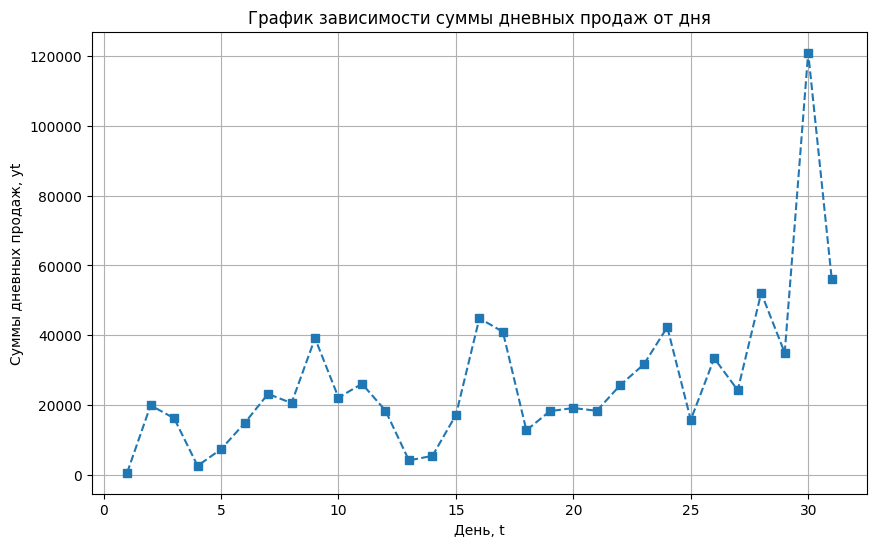

In [8]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data_frame[data_frame.columns[0]], data_frame[data_frame.columns[1]], '--s')
plt.title('График зависимости суммы дневных продаж от дня')
plt.xlabel('День, t')
plt.ylabel('Суммы дневных продаж, yt')
plt.grid(True)
plt.show()

# Вычисление коэффициентов автокорреляции с помощью библиотеки `statsmodels`

In [9]:
from statsmodels.tsa.stattools import acf

# Computing the autocorrelation coefficients
autocorrelation_coefficients = acf(data_frame[data_frame.columns[1]], nlags=8)
autocorrelation_coefficients

array([ 1.        ,  0.37493467,  0.23766887,  0.03152304,  0.05976978,
       -0.02209811,  0.1213934 ,  0.16090068,  0.05601852])

## Отображение полученных данных автокорреляции на графике

<Figure size 1000x600 with 0 Axes>

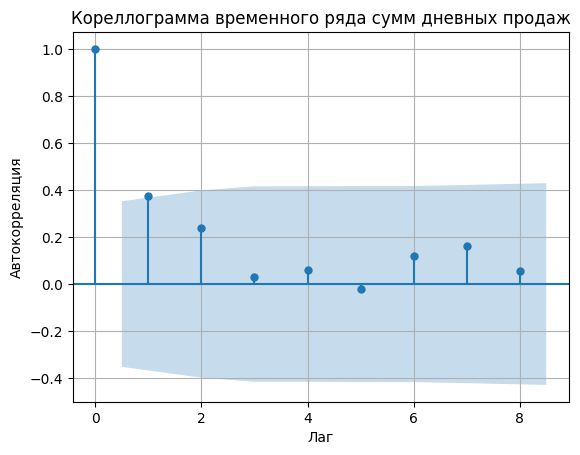

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(data_frame[data_frame.columns[1]], lags=8)
plt.title('Кореллограмма временного ряда сумм дневных продаж')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.axis('auto')
plt.grid()
plt.show()